In [1]:
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd 
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline
import plotly                          # Visualization using Plotly
import plotly.express as px
import plotly.graph_objs as go
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")  
from sklearn.model_selection import train_test_split                     # split  data into training and testing sets
from sklearn.linear_model import LinearRegression, Lasso, Ridge          # Linear Regression, Lasso and Ridge
from sklearn.linear_model import LogisticRegression                      # Logistic Regression
from sklearn.tree import DecisionTreeRegressor                           # Decision tree Regression
from sklearn.ensemble import RandomForestRegressor                       # this will make a Random Forest Regression
from sklearn import svm                                                  # this will make a SVM classificaiton
from sklearn.svm import SVC                                              # import SVC from SVM
import xgboost
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve,auc                                # ROC
from sklearn.preprocessing import StandardScaler                         # Standard Scalar
from sklearn.model_selection import GridSearchCV                         # this will do cross validation
from sklearn.decomposition import PCA                                    # to perform PCA to plot the data

import warnings                                                          # Ignore Warnings
warnings.filterwarnings("ignore")

C:\Users\ashwa\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
train=pd.read_csv('train (1).csv')
test=pd.read_csv('test.csv')


In [3]:
data = pd.concat([train, test], axis=0, sort=True)
display(data.dtypes.value_counts())
print('Dimensions of data:', data.shape)



object     43
int64      26
float64    12
dtype: int64

Dimensions of data: (2919, 81)


In [4]:
#Numerical
numeric_cols_train = train.select_dtypes(include=[np.number])
display(numeric_cols_train.head())
print('\n')
numeric_cols_train.columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
numeric_cols_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [6]:
#Categorical
#Numerical
category_cols_train = train.select_dtypes(include=[np.object])
display(category_cols_train.head())
print('\n')
category_cols_train.columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
#For test data
numeric_cols_test = test.select_dtypes(exclude='object')
display(numeric_cols_test.head())
print('\n')
numeric_cols_test.columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [8]:
categorical_cols_test = test.select_dtypes(include=[np.object])
display(categorical_cols_test.head())
print('\n')
categorical_cols_test.columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

# Missing values

In [10]:
train_missing = train.isnull().sum().sort_values(ascending=False)
train_missing = train_missing[train_missing > 0]
train_missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [11]:
test_missing=test.isnull().sum().sort_values(ascending=False)
test_missing=test_missing[test_missing>1]
test_missing

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
dtype: int64

<AxesSubplot:>

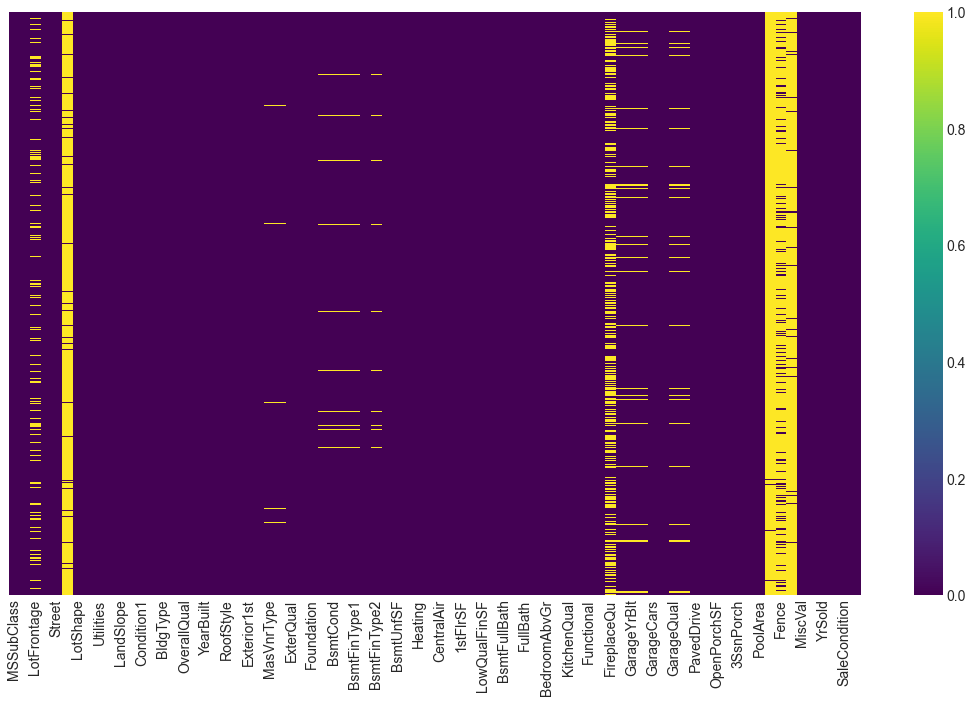

In [12]:
#Using HEat map
plt.figure(figsize=(17,10))
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

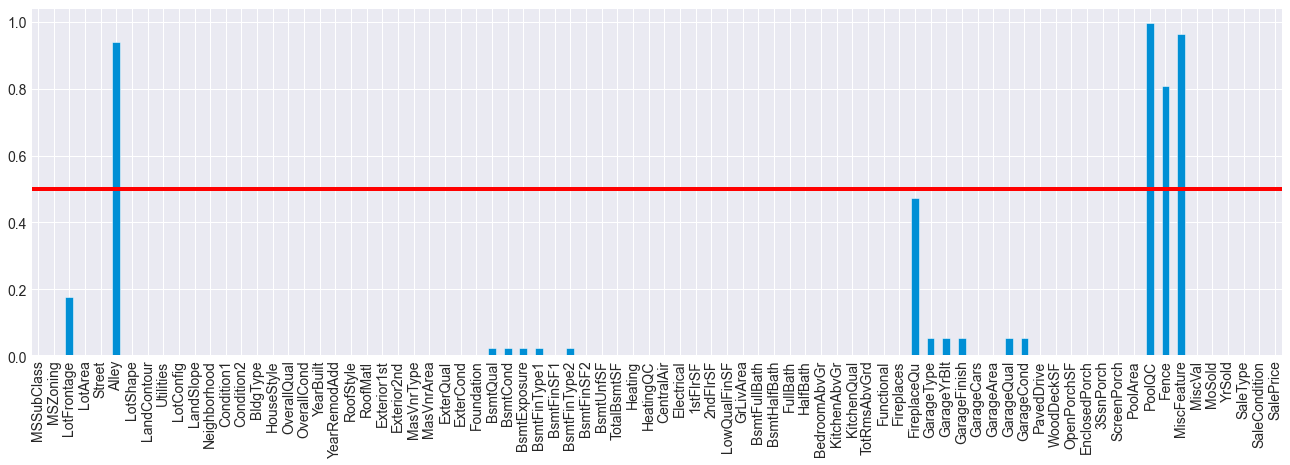

In [13]:
plt.figure(figsize = (20, 6))
missings = train.isnull().sum() / len(train)
missings.plot.bar()
plt.axhline(0.5, color = 'r')
plt.show()

In [14]:
# Percentage of Missing values in train dataset
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric cols'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric cols,,
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


In [15]:
#for test
total=test.isnull().sum().sort_values(ascending=False)
percent=((test.isnull().sum()/test.isnull().count())*100).sort_values(ascending=False)
missing=pd.concat([total,percent],axis=1,join='outer',keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric cols'
missing_data.head()

,Total Missing Count,% of Total Observations
Numeric cols,,
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274


# Find feature with one value

In [16]:
for column in train.columns:
    print(column,train[column].nunique())

MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscVal 21
Mo

# Explore the Categorical Features

In [17]:
categorical_features=[features for features in train.columns if train[features].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [18]:
for features in categorical_features:
    print("the feature {} has no of categories {}".format(features,len(train[features].unique())))

the feature MSZoning has no of categories 5
the feature Street has no of categories 2
the feature Alley has no of categories 3
the feature LotShape has no of categories 4
the feature LandContour has no of categories 4
the feature Utilities has no of categories 2
the feature LotConfig has no of categories 5
the feature LandSlope has no of categories 3
the feature Neighborhood has no of categories 25
the feature Condition1 has no of categories 9
the feature Condition2 has no of categories 8
the feature BldgType has no of categories 5
the feature HouseStyle has no of categories 8
the feature RoofStyle has no of categories 6
the feature RoofMatl has no of categories 8
the feature Exterior1st has no of categories 15
the feature Exterior2nd has no of categories 16
the feature MasVnrType has no of categories 5
the feature ExterQual has no of categories 4
the feature ExterCond has no of categories 5
the feature Foundation has no of categories 6
the feature BsmtQual has no of categories 5
the f

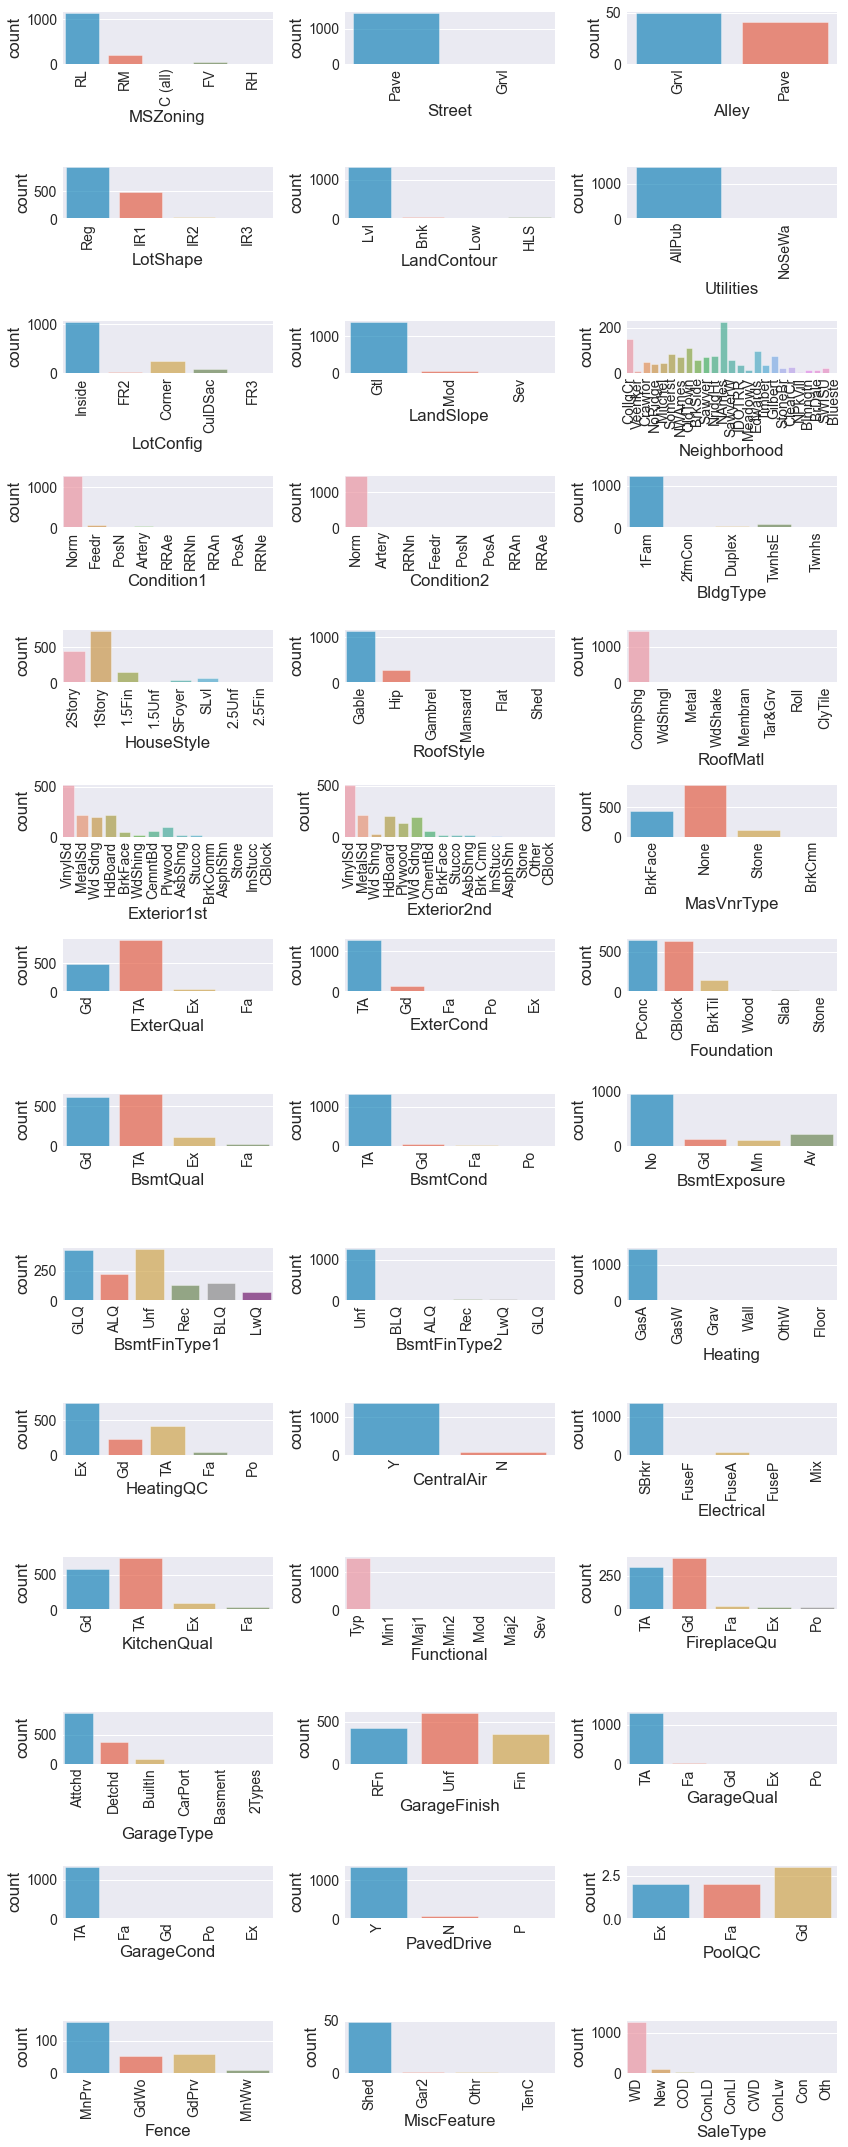

In [19]:
#Categorical distribution
fig, axes = plt.subplots(round(len(category_cols_train.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(category_cols_train.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=category_cols_train.columns[i], alpha=0.7, data=category_cols_train, ax=ax)

fig.tight_layout()

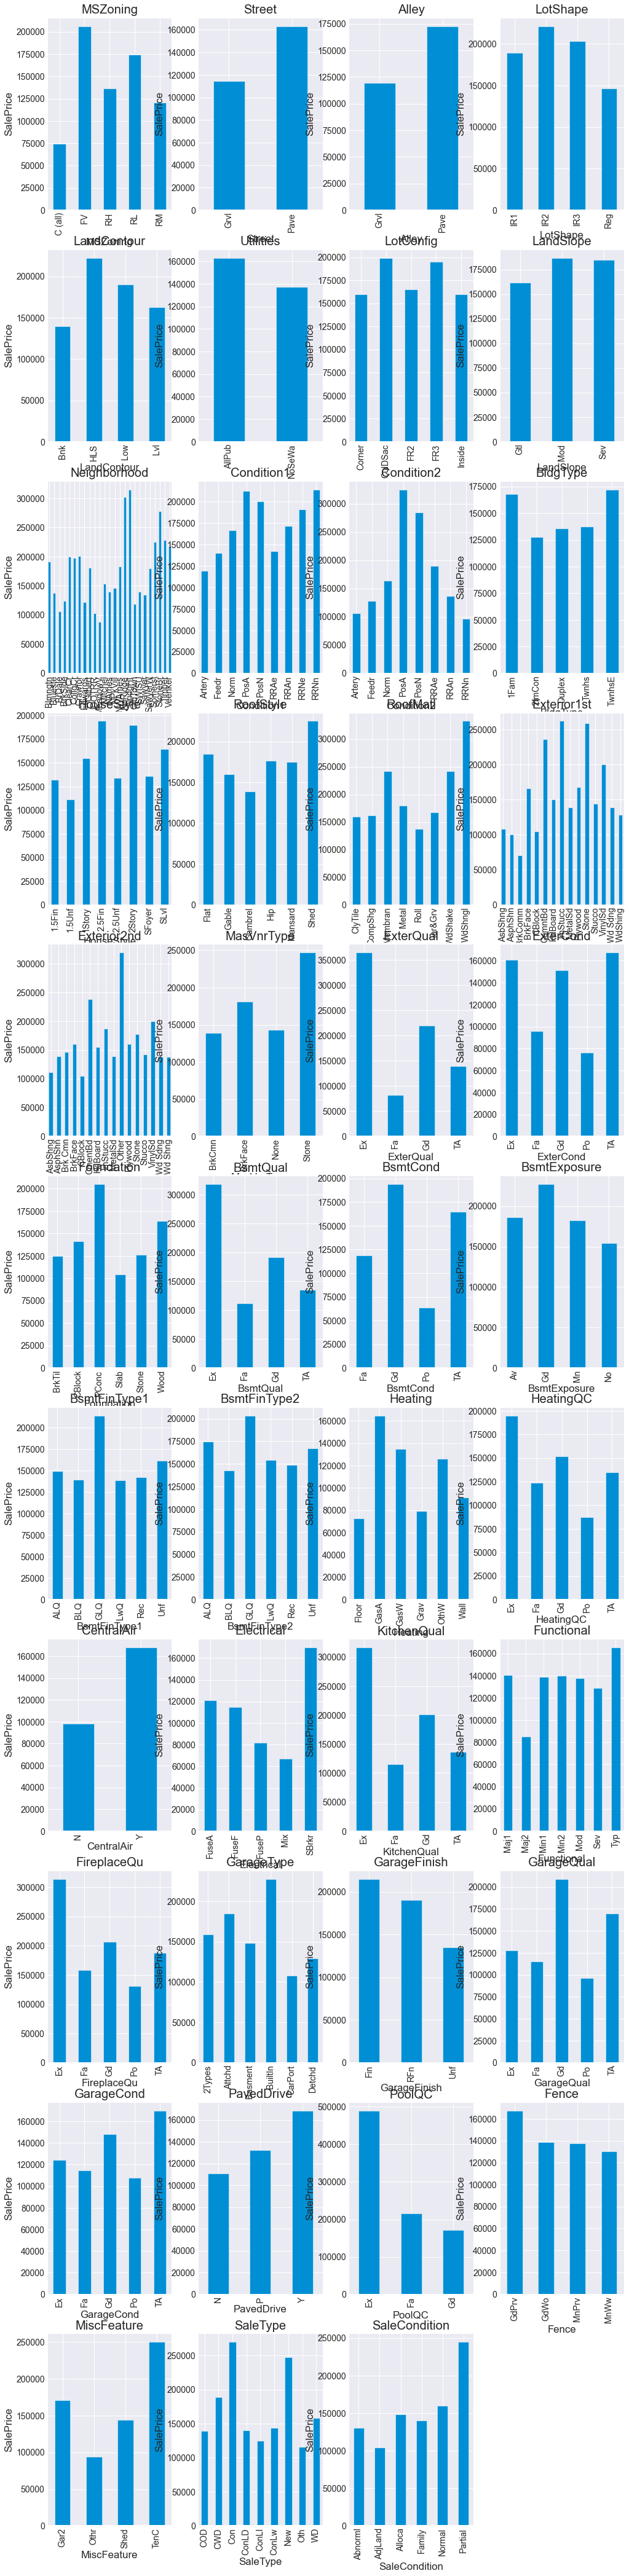

In [20]:
#Check relation between category and target column
plt.figure(figsize=(15,70), facecolor='white')
plotnumber =1
for feature in categorical_features:
    ax = plt.subplot(11,4,plotnumber)
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plotnumber+=1
plt.show()

# 7. Explore the Numerical Features

In [21]:
numerical_features = train.select_dtypes(exclude='object')
numerical_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [22]:
#Discrete data
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [23]:
#continous features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 19


In [24]:
continuous_features

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

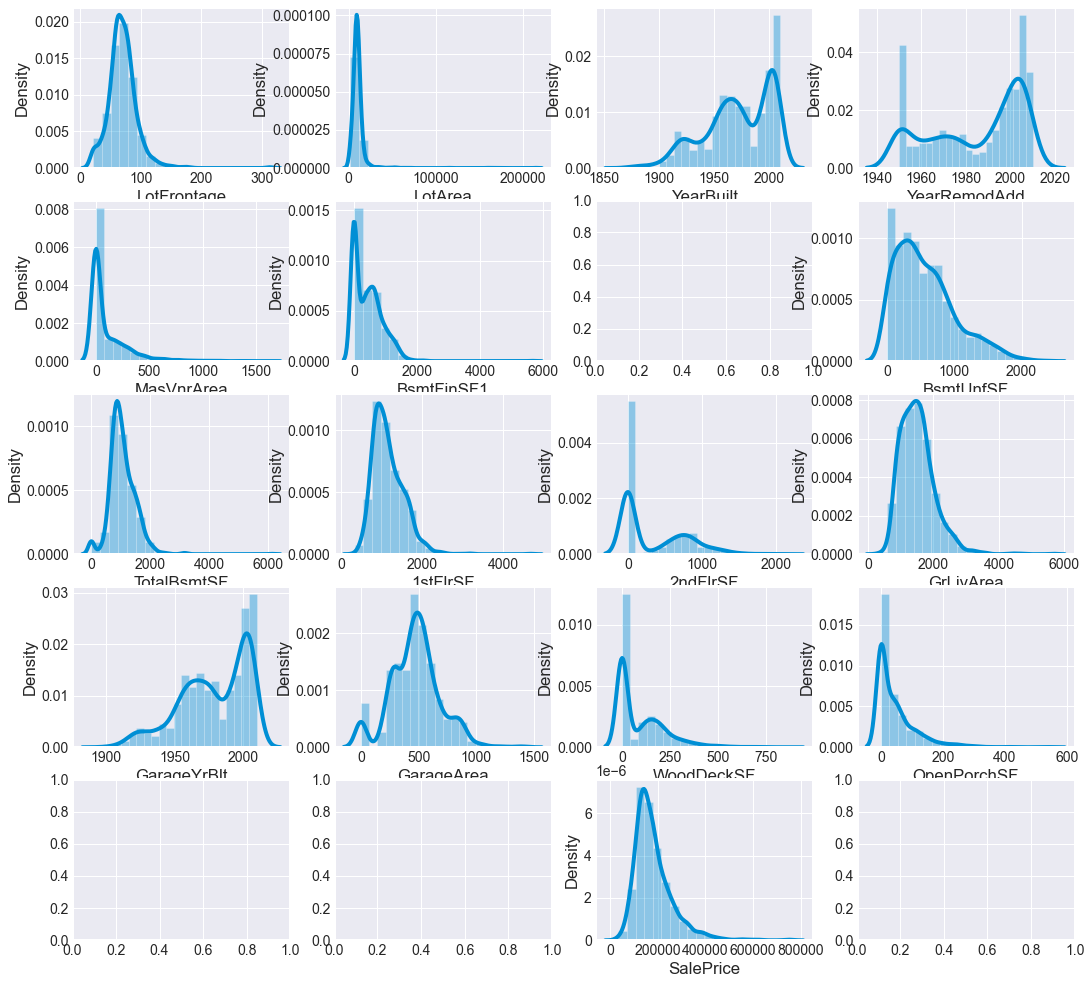

In [25]:
fig, ax = plt.subplots(5,4, figsize=(16,16))
sns.distplot(train.LotFrontage, bins = 20, ax=ax[0,0]) 
sns.distplot(train.LotArea, bins = 20, ax=ax[0,1]) 
sns.distplot(train.YearBuilt, bins = 20, ax=ax[0,2]) 
sns.distplot(train.YearRemodAdd, bins = 20, ax=ax[0,3])
sns.distplot(train.MasVnrArea, bins = 20, ax=ax[1,0]) 
sns.distplot(train.BsmtFinSF1, bins = 20, ax=ax[1,1]) 
sns.distplot(train.BsmtUnfSF, bins = 20, ax=ax[1,3])
sns.distplot(train.TotalBsmtSF, bins = 20, ax=ax[2,0])
sns.distplot(train['1stFlrSF'], bins = 20, ax=ax[2,1])
sns.distplot(train['2ndFlrSF'], bins = 20, ax=ax[2,2])
sns.distplot(train.GrLivArea, bins = 20, ax=ax[2,3])
sns.distplot(train.GarageYrBlt, bins = 20, ax=ax[3,0])
sns.distplot(train.GarageArea, bins = 20, ax=ax[3,1])
sns.distplot(train.WoodDeckSF, bins = 20, ax=ax[3,2])
sns.distplot(train.OpenPorchSF, bins = 20, ax=ax[3,3])
sns.distplot(train.SalePrice, bins = 20, ax=ax[4,2])
plt.show()

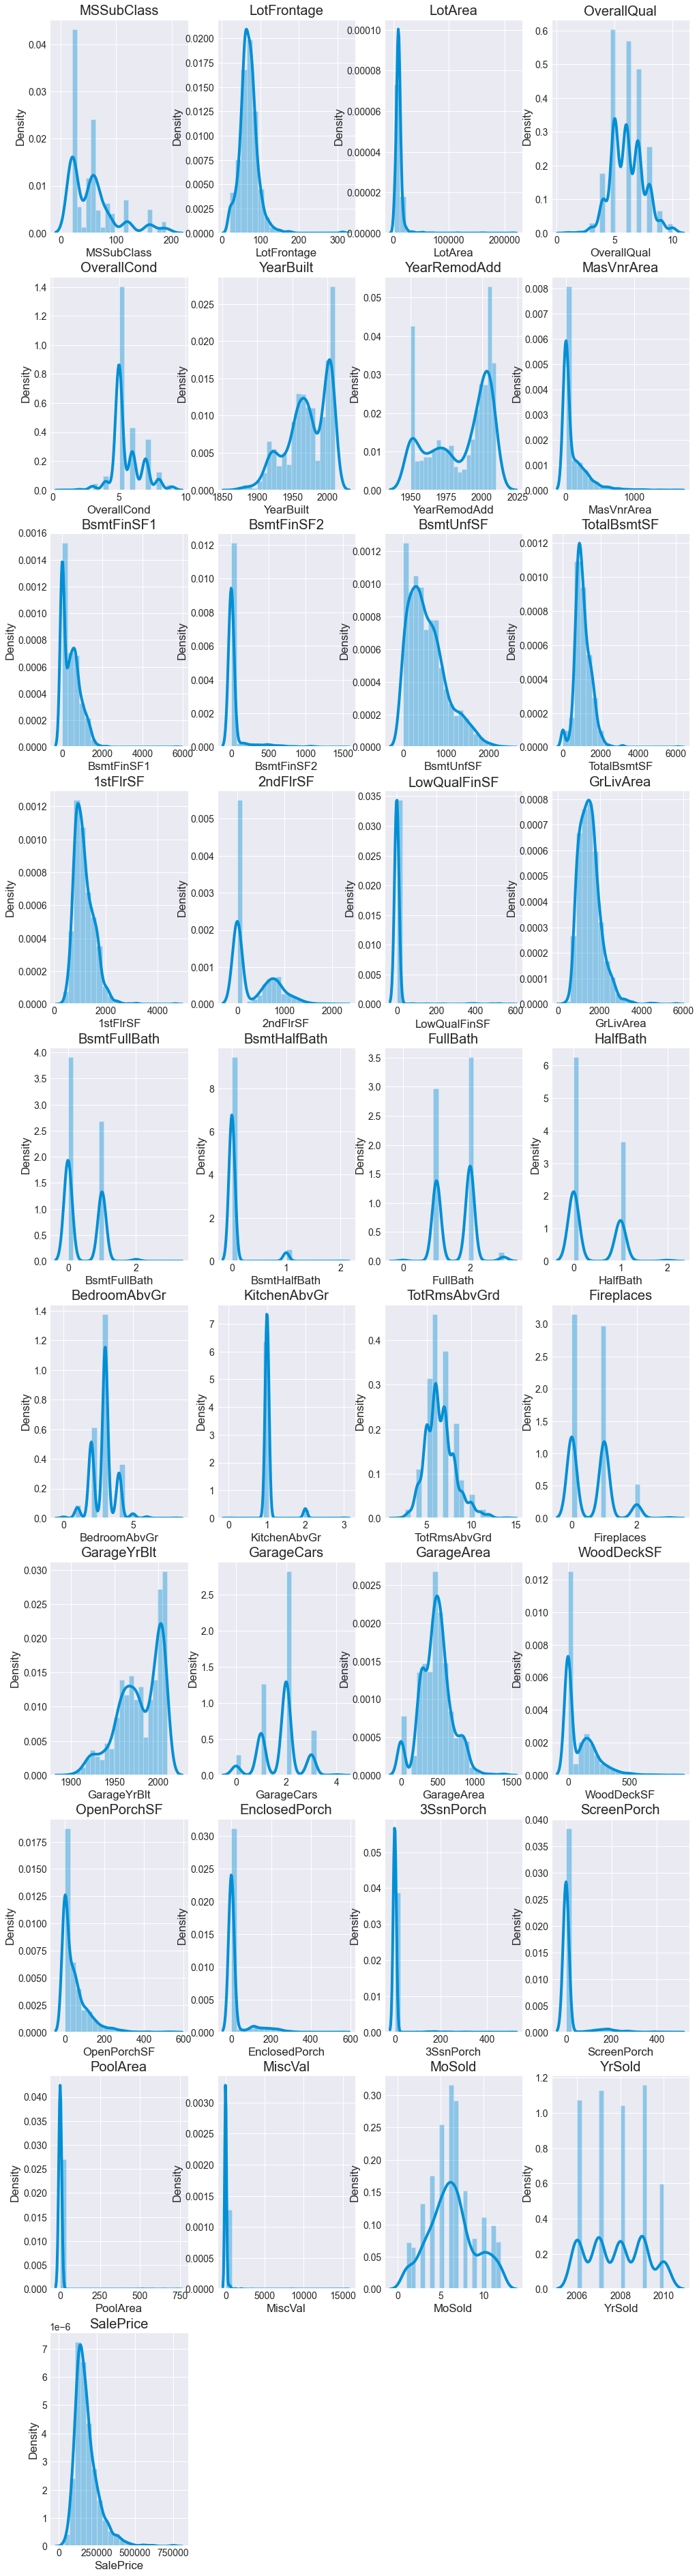

In [26]:
plt.figure(figsize=(15,70), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(11,4,plotnumber)
    data=train.copy()
    sns.distplot(data[feature], bins = 20) 
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(feature)
    plotnumber+=1
plt.show()

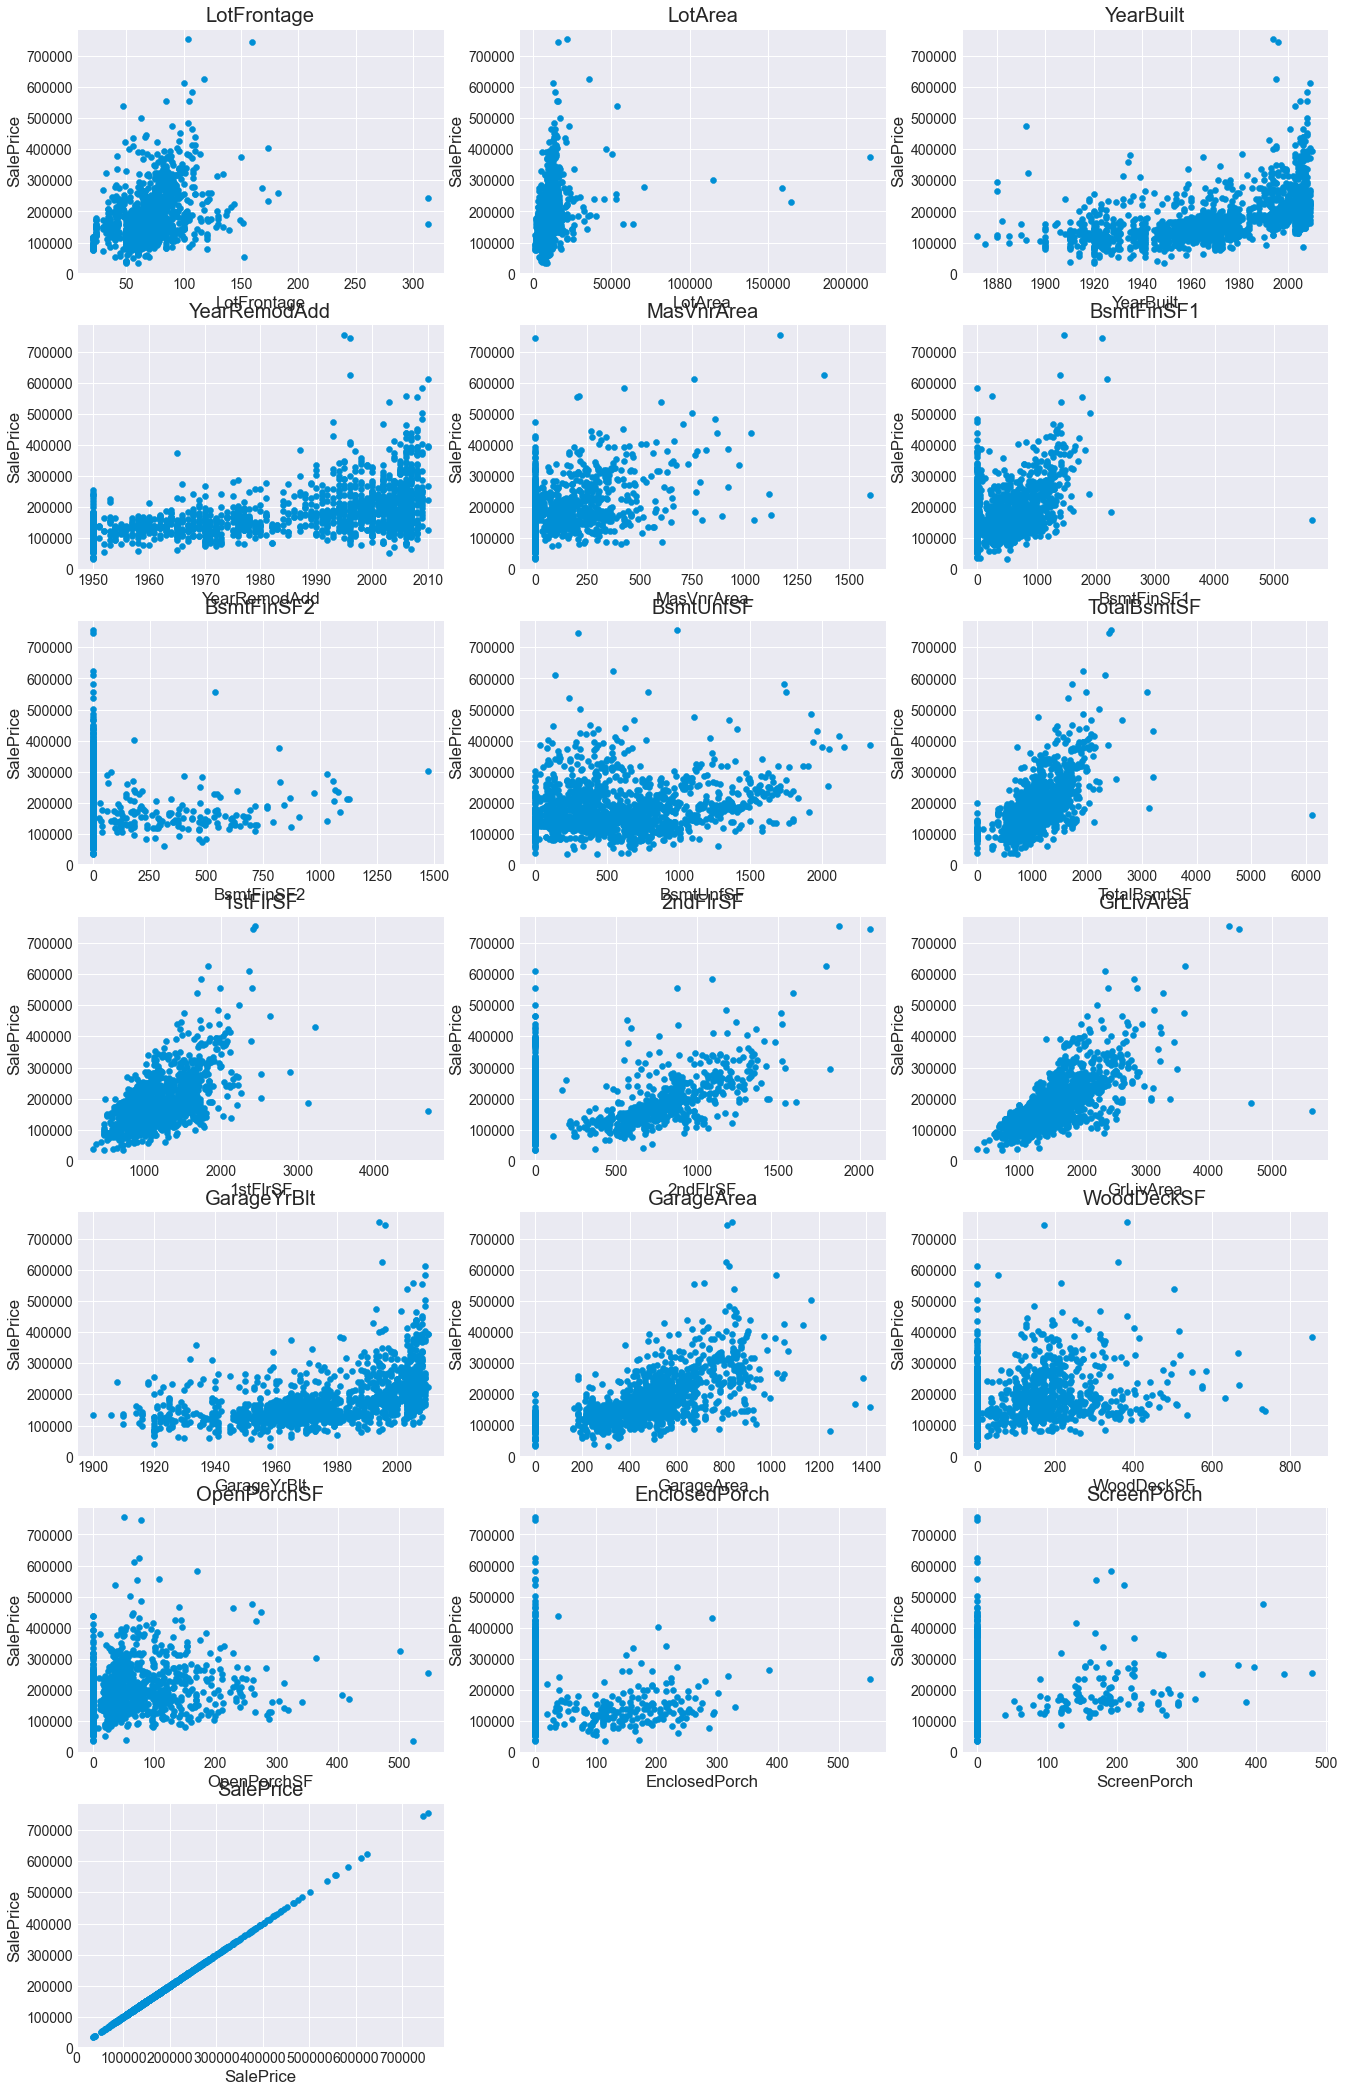

In [27]:
#REaltion between contionoius and taregt value
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=train.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(train[feature],train['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plotnumber+=1
plt.show()

# OUTLIERS

<AxesSubplot:>

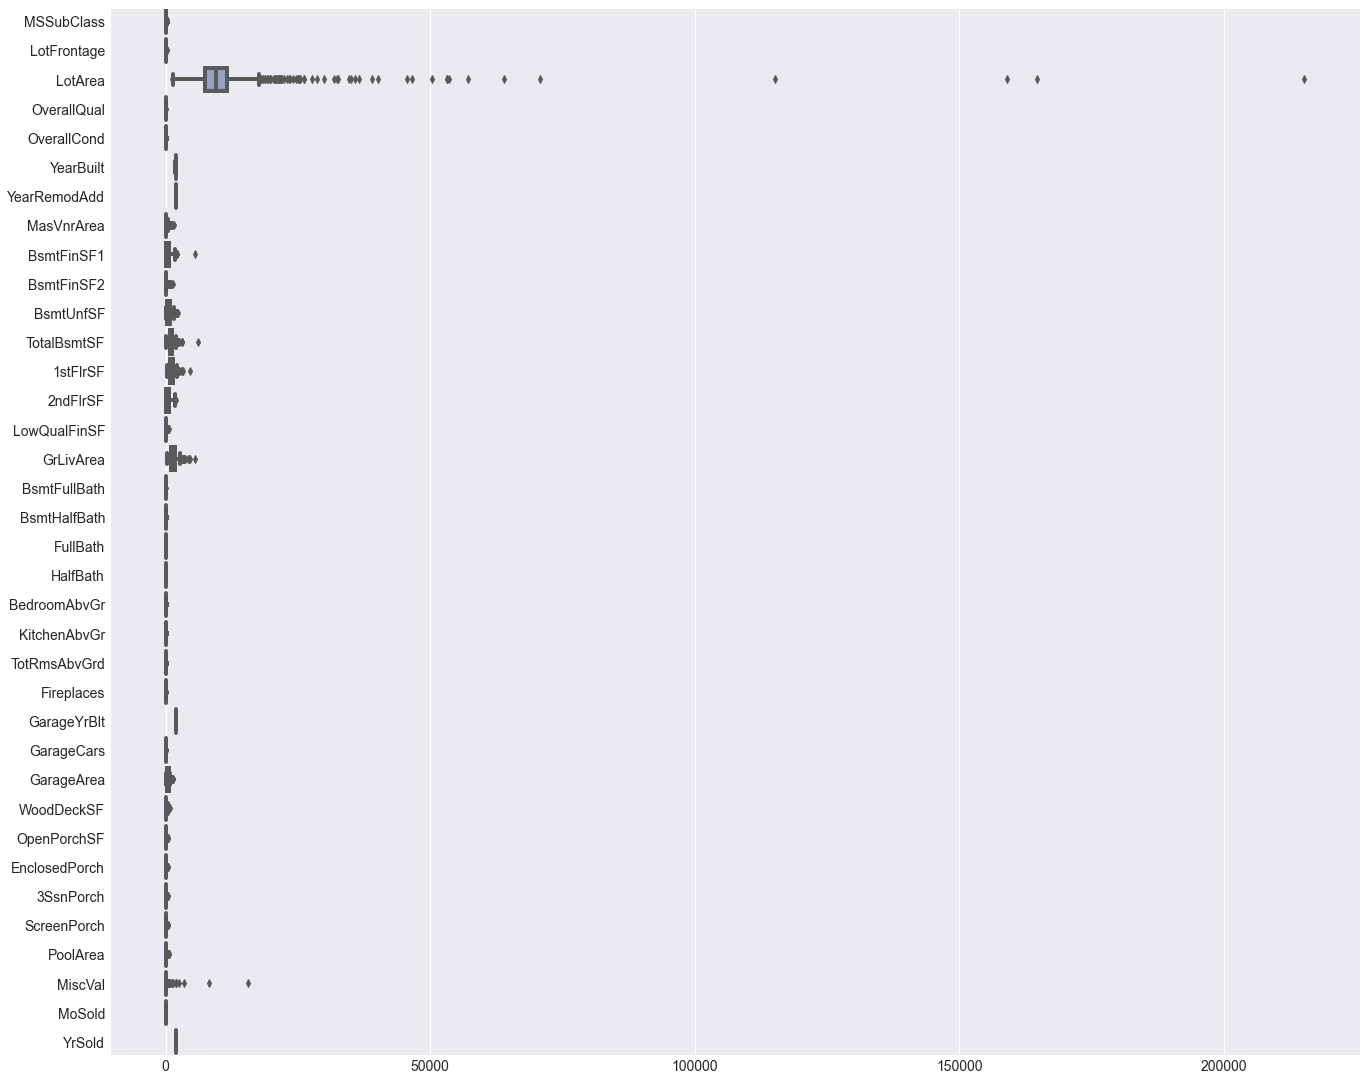

In [28]:
plt.figure(figsize=(20,18))
outlier=train.drop('SalePrice',axis=1)
sns.boxplot(data=outlier,orient='h',palette='Set2')

<AxesSubplot:>

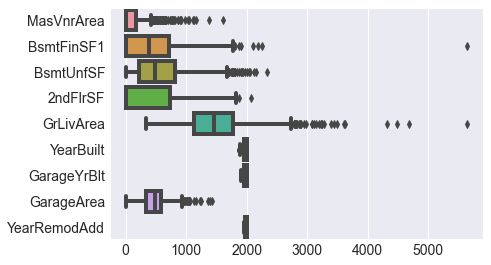

In [29]:
train_IQR = train[['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'YearBuilt', 'GarageYrBlt',
                   'GarageArea', 'YearRemodAdd']]
sns.boxplot(data=train_IQR,orient='h')

In [30]:
Q1=train_IQR.quantile(0.25)
Q3=train_IQR.quantile(0.75)
IQR=Q3-Q1

In [31]:
#Lets clean outlier
train_IQR_clean = train_IQR[~((train_IQR < (Q1 - 1.5*IQR)) | (train_IQR > (Q3 + 1.5*IQR))).any(axis=1)]

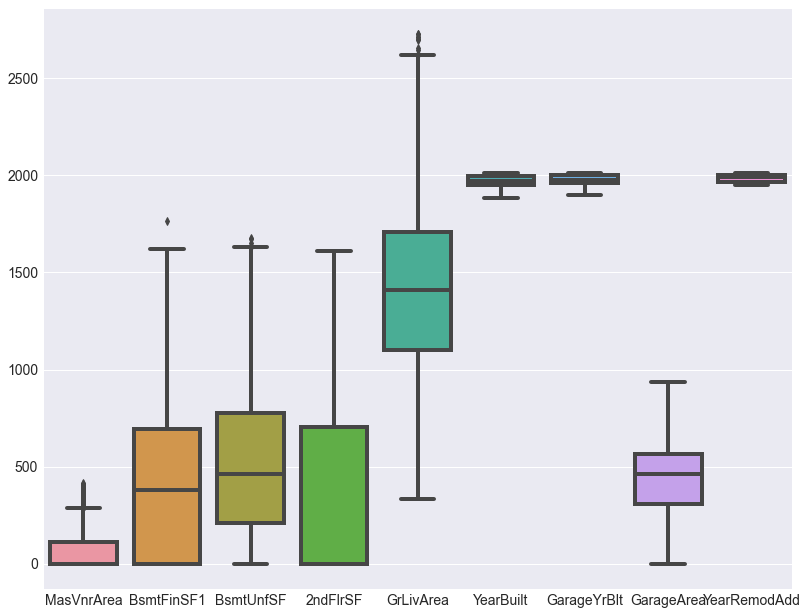

In [32]:
# boxplot() showing outlier
box = train_IQR_clean
plt.figure(figsize=(12,10))
sns.boxplot(data=box)
plt.show()

# Relation between Features


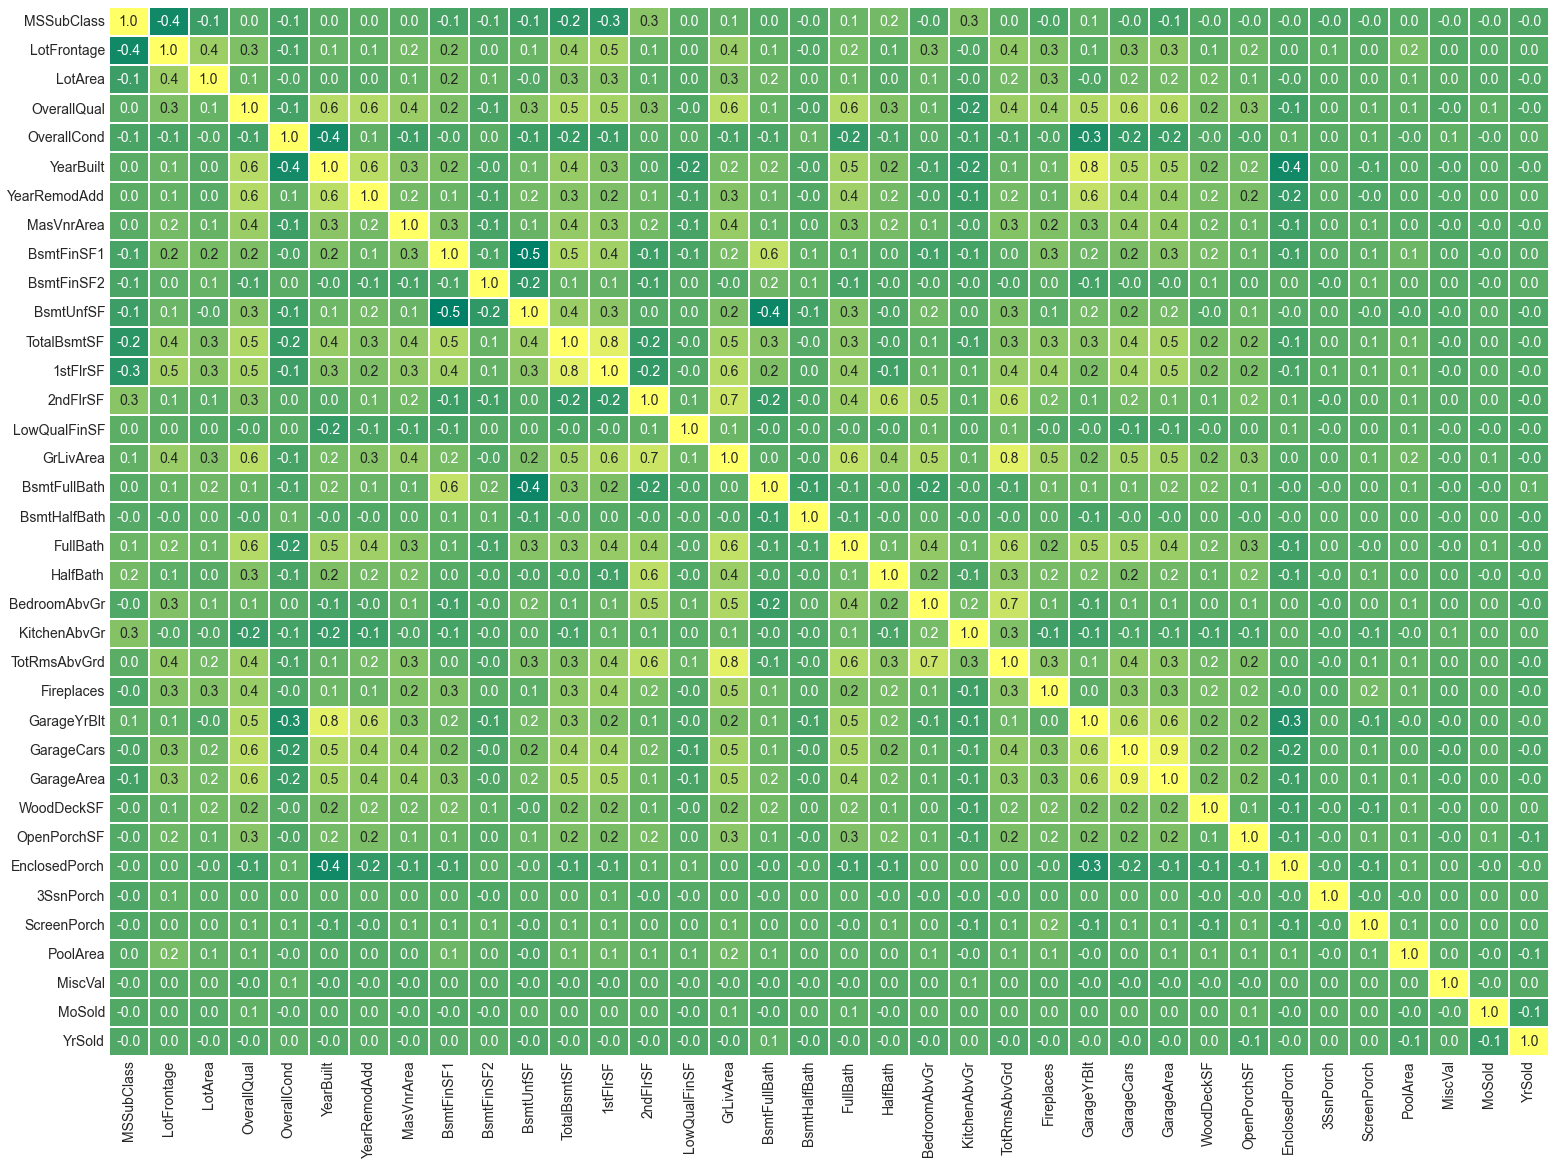

In [33]:
# Pearson Correlation
plt.figure(figsize=(23,18))
sns.heatmap(outlier.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='summer');

# Skewness and Kurtosis

In [34]:
train.skew()

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

Text(0.5, 1.0, 'Skew:1.8828757597682129')

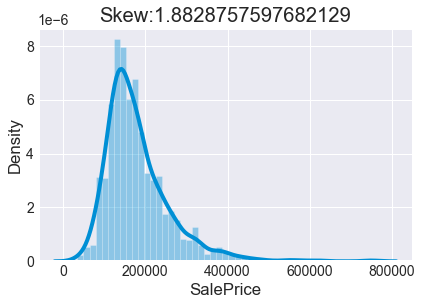

In [35]:
# Checking Skewness for feature "SalePrice"
sns.distplot(train['SalePrice'])
Skew_SalePrice = train['SalePrice'].skew()
plt.title("Skew:"+str(Skew_SalePrice))

Text(0.5, 1.0, 'Skew:0.12134661989685333')

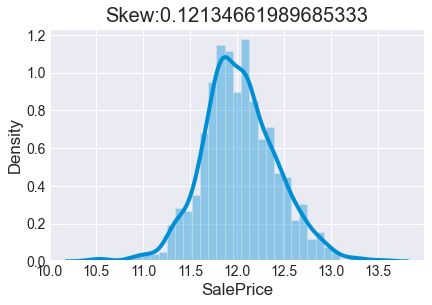

In [36]:
# SalePrice right skewed; log transform)
sns.distplot(np.log(train['SalePrice']+1))
Skew_SalePrice_Log = np.log(train['SalePrice']+1).skew()
plt.title("Skew:"+str(Skew_SalePrice_Log))

In [37]:
#log normal on highly skewed columns
log_LotArea_train = np.log(train['LotArea'])
recipr_LowQualFinSF_train = np.reciprocal(train['LowQualFinSF'])
recipr_3SsnPorch_train = np.reciprocal(train['3SsnPorch'])
cuberoot_PoolArea_train = np.cbrt(train['PoolArea'])
recipr_MiscVal_train = np.reciprocal(train['MiscVal'])

In [38]:
train_skew = pd.concat([log_LotArea_train, recipr_LowQualFinSF_train, recipr_3SsnPorch_train,
                        recipr_MiscVal_train], axis=1)
train_skew

,LotArea,LowQualFinSF,3SsnPorch,MiscVal
0,9.041922,-9223372036854775808,-9223372036854775808,-9223372036854775808
1,9.169518,-9223372036854775808,-9223372036854775808,-9223372036854775808
2,9.328123,-9223372036854775808,-9223372036854775808,-9223372036854775808
3,9.164296,-9223372036854775808,-9223372036854775808,-9223372036854775808
4,9.565214,-9223372036854775808,-9223372036854775808,-9223372036854775808
...,...,...,...,...
1455,8.976768,-9223372036854775808,-9223372036854775808,-9223372036854775808
1456,9.486076,-9223372036854775808,-9223372036854775808,-9223372036854775808
1457,9.109636,-9223372036854775808,-9223372036854775808,0
1458,9.181632,-9223372036854775808,-9223372036854775808,-9223372036854775808


In [39]:
train.drop(['LotArea','LowQualFinSF','3SsnPorch','MiscVal'], inplace=True, axis=1)
train.head()

,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,12,2008,WD,Normal,250000


In [40]:
#joining log transformed data with trained one
new_train = pd.concat([train, train_skew], axis=1)
new_train.head()

,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotArea,LowQualFinSF,3SsnPorch,MiscVal
0,60,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,2,2008,WD,Normal,208500,9.041922,-9223372036854775808,-9223372036854775808,-9223372036854775808
1,20,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,NaN,5,2007,WD,Normal,181500,9.169518,-9223372036854775808,-9223372036854775808,-9223372036854775808
2,60,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,NaN,9,2008,WD,Normal,223500,9.328123,-9223372036854775808,-9223372036854775808,-9223372036854775808
3,70,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,NaN,2,2006,WD,Abnorml,140000,9.164296,-9223372036854775808,-9223372036854775808,-9223372036854775808
4,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,NaN,12,2008,WD,Normal,250000,9.565214,-9223372036854775808,-9223372036854775808,-9223372036854775808


In [41]:
numeric_cols_test.skew()

Id                0.000000
MSSubClass        1.346690
LotFrontage       0.661921
LotArea           3.115217
OverallQual       0.181196
OverallCond       0.449165
YearBuilt        -0.587657
YearRemodAdd     -0.399906
MasVnrArea        2.533377
BsmtFinSF1        1.165677
BsmtFinSF2        4.041345
BsmtUnfSF         0.919916
TotalBsmtSF       0.813589
1stFlrSF          1.558195
2ndFlrSF          0.912883
LowQualFinSF     16.167254
GrLivArea         1.130402
BsmtFullBath      0.649698
BsmtHalfBath      3.779866
FullBath          0.295839
HalfBath          0.714728
BedroomAbvGr      0.436623
KitchenAbvGr      4.079055
TotRmsAbvGrd      0.842597
Fireplaces        0.819858
GarageYrBlt      -0.158363
GarageCars       -0.107142
GarageArea        0.300239
WoodDeckSF        2.130760
OpenPorchSF       2.687779
EnclosedPorch     4.669172
3SsnPorch        12.524216
ScreenPorch       3.788244
PoolArea         20.196888
MiscVal          20.075188
MoSold            0.183022
YrSold            0.168986
d

In [42]:
#Removing skewness on some more 
cube_root_LowQualFinSF_test = np.cbrt(test['LowQualFinSF'])
cube_root_3SsnPorch_test = np.cbrt(test['3SsnPorch'])
recipr_PoolArea_test = np.reciprocal(test['PoolArea'])
cube_root_MiscVal_test = np.cbrt(test['MiscVal'])

In [43]:
# Drop columns of train dataset with more than 25% of missing data

train.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], inplace=True, axis=1)

In [44]:
# Drop columns of test dataset with more than 25% of missing data

test.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], inplace=True, axis=1)

# filling nan values of categorical features by their mode and numeric ones by thier mean.¶


In [55]:
#Train data
   # Numeric Features
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())  # float
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())  # float
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())     # float
    
      # Categorical Features
        
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
    
    # test data
    
      # Numeric Featurestrain
        
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())  # float
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())  # float
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())     # float
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
    
      # Categorical Features
        
test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['GarageQual'] = test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])
test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
        
    

In [58]:
# Transform discrete values to columns with 1 and 0s
train_OHE = pd.get_dummies(train)

# Do the same for competition data
test_OHE = pd.get_dummies(test)

In [59]:
train_OHE.shape

(1460, 267)

In [60]:
test_OHE.shape

(1459, 254)

['Condition2_RRAn', 'RoofMatl_ClyTile', 'Electrical_Mix', 'RoofMatl_Metal', 'HouseStyle_2.5Fin', 'RoofMatl_Roll', 'RoofMatl_Membran', 'Utilities_NoSeWa', 'Condition2_RRNn', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_OthW', 'Exterior1st_ImStucc', 'Heating_Floor', 'SalePrice', 'Condition2_RRAe', 'GarageQual_Ex']


In [62]:
# There is a differece between features in the training data set and the test data set
# We will try dropping the features that are not present in both sets

missingFeatures_train = list(set(train_OHE.columns.values) - set(test_OHE.columns.values))
train_OHE = train_OHE.drop(missingFeatures_train, axis=1)

missingFeatures_test = list(set(test_OHE.columns.values) - set(train_OHE.columns.values))
test_OHE = test_OHE.drop(missingFeatures_test, axis=1)

In [63]:
X=train_OHE
y=train['SalePrice']

In [66]:
# split  data into training and testing sets of 80:20 ratio
# 20% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

# Linear Regression / Lasso / Ridge

In [67]:
Regression=LinearRegression()
Regression.fit(X_train,y_train)

LinearRegression()

In [69]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(Regression, open(filename, 'wb'))

In [71]:
Regression.score(X_train,y_train)

0.912968377039997

In [74]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = Regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [75]:
adj_r2(X_train,y_train)

0.8892411079669319

In [76]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [77]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [86]:
y_pred_LinReg = Regression.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_train_LinReg = Regression.predict(X_train)

In [87]:
print("Linear Regression : Train Score {:.2f} & Test Score {:.2f}".format(Regression.score(X_train, y_train), Regression.score(X_test, y_test)))
print("Lasso Regression : Train Score {:.2f} & Test Score {:.2f}".format(lasso.score(X_train, y_train), lasso.score(X_test, y_test)))
print("Ridge Regression : Train Score {:.2f} & Test Score {:.2f}".format(ridge.score(X_train, y_train), ridge.score(X_test, y_test)))

Linear Regression : Train Score 0.91 & Test Score 0.86
Lasso Regression : Train Score 0.91 & Test Score 0.86
Ridge Regression : Train Score 0.91 & Test Score 0.87


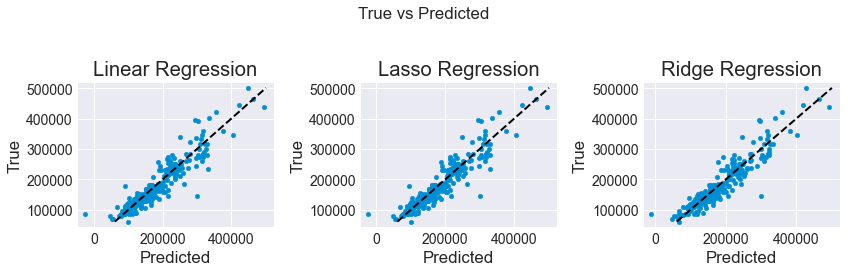

In [88]:
# Plotting Predictions
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_LinReg, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")
fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])